# Single Model Energy-depedent Classification Performance Analysis

In [16]:
%matplotlib inline
import mysetup

# Simply Run the usual experiment, using -L option to specify the model to load
# Sets up the model and the data

%run -im CaloDNN.ClassificationExperiment -- --NoAnalysis --NoTrain --NoModel --cpu

Using GPU 0
HyperParameter Scan:  240 possible combiniations.
______________________________________
ScanConfiguration
______________________________________
Picked combination:  0
Combo[0]={'Width': 32, 'Depth': 1, 'lr': 0.01, 'optimizer': "'RMSprop'", 'decay': 0.01}
Model Filename:  CaloDNN_32_1_0.01_RMSprop_0.01
______________________________________
Using PremixGenerator.


OSError: [Errno 12] Cannot allocate memory

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2589: UserWarning: Unknown failure executing module: <CaloDNN.ClassificationExperiment>
  warn('Unknown failure executing module: <%s>' % mod_name)


In [2]:
Norms=[150.,150.,1.]
N_Test_Events=100000
Test_genC1 = MakePreMixGenerator(InputFile, BatchSize=BatchSize,
                                Skip=NSamples, Max=N_Test_Events,
                                Norms=Norms+[1.], ECAL=True, Energy=True,
                                HCAL=True, n_threads=n_threads)

# Preload the data, adding target which contains the energy

Test_genC1.PreloadData()

Test_X_ECAL, Test_X_HCAL, Test_Y, target = tuple(Test_genC1.D)


In [3]:
print Test_X_ECAL.shape
print Test_X_HCAL.shape
print Test_Y.shape
print target.shape
print Norms


(101024, 25, 25, 25)
(101024, 5, 5, 60)
(101024, 4)
(101024, 1, 5)
[150.0, 150.0, 1.0]


In [6]:
# Bin the data
Energy=target[:,:,2].flatten()

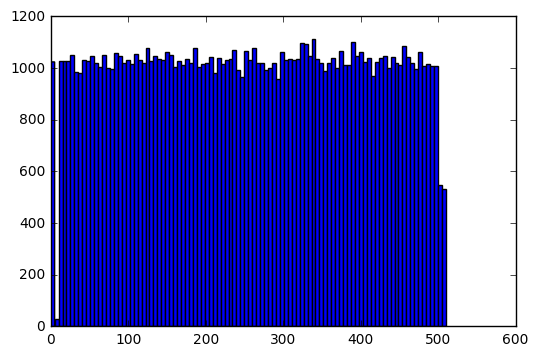

In [7]:
tmp=plt.hist(Energy,bins=100)

In [10]:
Test_X_ECAL_flat=Test_X_ECAL[:,:,:,:].flatten()

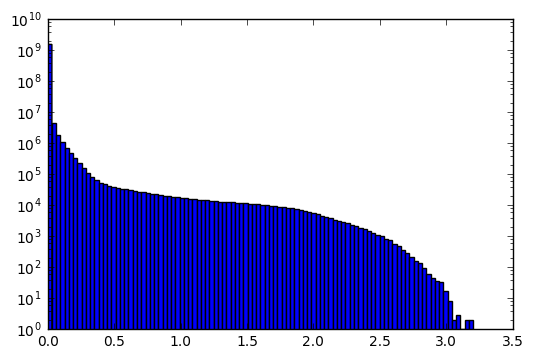

In [12]:
tmp=plt.hist(Test_X_ECAL_flat,bins=100,log=True)

In [18]:
np.max(Test_X_ECAL_flat)

3.2025892734527588

In [19]:
np.max(Test_X_ECAL)

3.2025892734527588

In [13]:
Test_X_HCAL_flat=Test_HCAL[:,:,:,:].flatten()

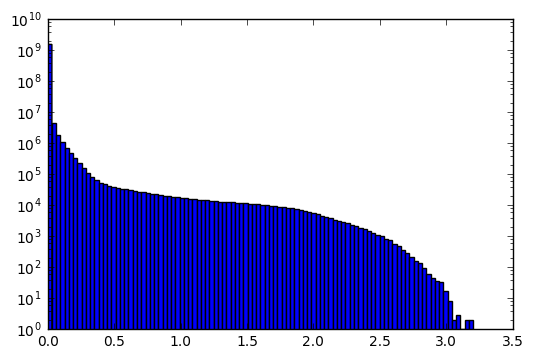

In [14]:
tmp=plt.hist(Test_X_HCAL_flat,bins=100,log=True)

In [20]:
np.max(Test_X_HCAL_flat)

3.2025892734527588

In [21]:
np.max(Test_X_HCAL)

8.2364864349365234

In [22]:
150*3.2026

480.39

In [23]:
150*8.2365

1235.475